# Energy in Spain: dataset

The "energy.csv" dataset contains timeseries regarding the power market in Spain.

Explanation of columns:
* datetime: moment at which the observation happened, in UTC (https://en.wikipedia.org/wiki/Coordinated_Universal_Time)
* power_demand: total consumption of electricity in MWh (MegaWatt-hours) [consumption]
* nuclear: total energy generated in nuclear power plants in MWh [power generation]
* gas: total energy generated in gas powered plants in MWh [power generation]
* solar: total energy generated in solar farms in MWh [power generation]
* hydro: total energy generated in hydro dams in MWh [power generation]
* coal: total energy generated in coal powered plants in MWh [power generation]
* wind: total energy generated in wind farms in MWh [power generation]
* spot_price: price at which the energy is sold (generation) or bought (consumption) in €/MWh [price]

### Import needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Get the data as a pandas Dataframe

In [2]:
data = pd.read_csv("energy.csv")
data.head()

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price
0,2019-01-01T00:00:00.000+01:00,23251.2,6059.2,2954.0,7.1,3202.8,1867.0,3830.3,66.88
1,2019-01-01T01:00:00.000+01:00,22485.0,6059.2,3044.1,8.0,2884.4,1618.0,3172.1,66.88
2,2019-01-01T02:00:00.000+01:00,20977.0,6059.2,3138.6,7.5,1950.8,1535.3,2980.5,66.00
3,2019-01-01T03:00:00.000+01:00,19754.2,6059.2,3596.2,7.5,1675.7,1344.0,2840.0,63.64
4,2019-01-01T04:00:00.000+01:00,19320.6,6063.4,3192.6,7.5,1581.8,1345.0,3253.4,58.85


### Calculate the following

#### Shape (1 p)

In [3]:
data.shape

(8737, 9)

#### Create a list called "features" containing all the columns that are not "datetime" (1 p)

In [10]:
# use filter or list comprehensions or for loops or dark magic
 
features = list(data.dtypes[data.dtypes != pd.datetime].index)
    
print(features)

['power_demand', 'nuclear', 'gas', 'solar', 'hydro', 'coal', 'wind', 'spot_price']


#### How many NaN are there in the dataset? (1 p)

In [11]:
# "Dealing with missing values" in the slides

data.isnull().sum().sum()

2541

#### Convert the "datetime" column into a Series containing datetime objects (0.5 p)

Pass utc=True as argument to your function of choice *cough* pd.to_dat... *cough*

In [17]:
# pandas datetime functionalities

data['datetime'] = pd.to_datetime(arg = data['datetime'], utc = True)

#### Create the following columns (0.5 p)
* year
* month
* day
* hour
* weekday

In [62]:
# pandas datetime functionalities

data['year'], data['month'], data['day'], data['hour'], data['weekday'] = [data['datetime'].dt.year, data['datetime'].dt.month, data['datetime'].dt.day, data['datetime'].dt.hour, data['datetime'].dt.weekday]

data.head()

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,year,month,day,hour,weekday,weekend,season
0,2018-12-31 23:00:00+00:00,23251.2,6059.2,2954.0,7.1,3202.8,1867.0,3830.3,66.88,2018,12,31,23,0,False,winter
1,2019-01-01 00:00:00+00:00,22485.0,6059.2,3044.1,8.0,2884.4,1618.0,3172.1,66.88,2019,1,1,0,1,False,winter
2,2019-01-01 01:00:00+00:00,20977.0,6059.2,3138.6,7.5,1950.8,1535.3,2980.5,66.00,2019,1,1,1,1,False,winter
3,2019-01-01 02:00:00+00:00,19754.2,6059.2,3596.2,7.5,1675.7,1344.0,2840.0,63.64,2019,1,1,2,1,False,winter
4,2019-01-01 03:00:00+00:00,19320.6,6063.4,3192.6,7.5,1581.8,1345.0,3253.4,58.85,2019,1,1,3,1,False,winter


#### Create a "weekend" column containing True if day is Sat/Sun or False if day is Mon/Tue/... (1 p)

In [51]:
# feature engineering
# use your already beloved (map + lambda functions)
# or list comprehensions

data['weekend'] = data['weekday'].map(lambda x: True if x == 5 or x == 6 else False)

datetime        datetime64[ns, UTC]
power_demand                float64
nuclear                     float64
gas                         float64
solar                       float64
hydro                       float64
coal                        float64
wind                        float64
spot_price                  float64
year                          int64
month                         int64
day                           int64
hour                          int64
weekday                       int64
weekend                        bool
dtype: object

#### Calculate the average values per weekday for the columns in "features" list (1 p)

In [46]:
# features is the list you created in the beginning

data.groupby('weekday').agg(np.mean)[features]

,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price
weekday,,,,,,,,
0,29207.582306,6390.911769,6483.540032,1382.902420,2919.916173,1282.017737,5846.823379,49.239688
1,29760.259375,6391.128526,6716.402003,1400.603377,2870.550401,1478.384477,5795.669712,50.202580
2,29814.897436,6399.605689,6448.102244,1386.101098,2856.419471,1444.195997,6451.173798,48.811442
3,29913.133253,6408.186458,6404.798397,1396.425420,2904.324439,1364.827287,6452.391747,48.817388
4,29587.505689,6404.227003,6362.183894,1437.464229,3027.978526,1294.994618,6071.198638,48.785793
5,26545.257933,6325.359535,4965.318109,1418.782988,2604.202644,1057.801583,5826.916346,45.429864
6,24759.381490,6353.419231,4089.475000,1373.876790,2439.531651,912.083292,6061.215064,42.653966


#### Create a function that returns the season out of a datetime object (0.5 p)
Use that function to create a "season" column

In [60]:
# easy peasy

def season(datetime):
    month = datetime.month
    if month >= 3 and month <= 5:
        return "spring"
    elif month >= 6 and month <= 8:
        return "summer"
    elif month >= 9 and month <= 11:
        return "fall"
    else:
        return "winter"

data['season'] = data['datetime'].map(season)

data.head()

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,year,month,day,hour,weekday,weekend,season
0,2018-12-31 23:00:00+00:00,23251.2,6059.2,2954.0,7.1,3202.8,1867.0,3830.3,66.88,2018,12,31,23,0,False,winter
1,2019-01-01 00:00:00+00:00,22485.0,6059.2,3044.1,8.0,2884.4,1618.0,3172.1,66.88,2019,1,1,0,1,False,winter
2,2019-01-01 01:00:00+00:00,20977.0,6059.2,3138.6,7.5,1950.8,1535.3,2980.5,66.00,2019,1,1,1,1,False,winter
3,2019-01-01 02:00:00+00:00,19754.2,6059.2,3596.2,7.5,1675.7,1344.0,2840.0,63.64,2019,1,1,2,1,False,winter
4,2019-01-01 03:00:00+00:00,19320.6,6063.4,3192.6,7.5,1581.8,1345.0,3253.4,58.85,2019,1,1,3,1,False,winter


#### Calculate average demand and spot_price for each season (1 p)

In [63]:
data.groupby('season').agg(np.mean)[['power_demand', 'spot_price']]

,power_demand,spot_price
season,,
fall,27926.784112,43.859789
spring,27275.742482,49.198279
summer,29075.777038,47.866703
winter,29807.581563,49.928872


#### Why are there so many NaN values in the "solar" column? (0.5 p - extra)

#### Calculate the total income for each type of power generation and total costs for consumption (4 p) 
Return a dictionary like the following one:

{ "consumption": cost_consumption, "wind": income_wind, "solar": income_solar, "gas": income_gas, ...} 

In [70]:
# Income = energy_generated * price
# Cost = energy_bought * price

cost_and_income = {}
price = data['spot_price']
for i in features:
    if i == 'spot_price':
        continue   
    else:
        cost_and_income[i] = (data[i] * price).sum()

# just in case you are picky about the consumption key being actually called consumption and not power_demand
cost_and_income['consumption'] = cost_and_income.pop('power_demand')        
        
cost_and_income

{'nuclear': 2674992442.1679997,
 'gas': 2577997502.639,
 'solar': 430157479.785,
 'hydro': 1179143190.696,
 'coal': 591516973.36,
 'wind': 2412917661.565,
 'consumption': 12115827296.223999}

#### Create two plots: (2 p)
* Hourly average power demand
* Hourly average spot price

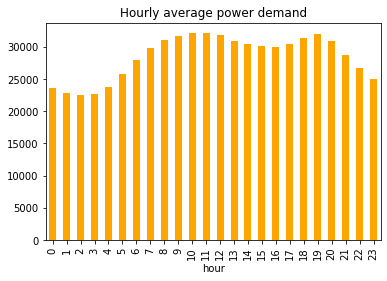

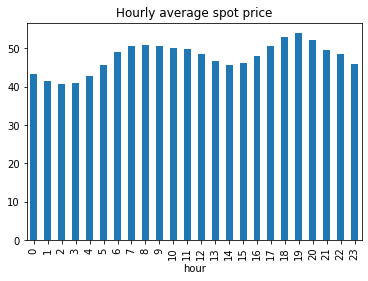

In [92]:
data.groupby('hour').agg(np.mean)['power_demand'].plot(kind = 'bar', color = 'orange').set_title('Hourly average power demand')
plt.show()
data.groupby('hour').agg(np.mean)['spot_price'].plot(kind = 'bar').set_title('Hourly average spot price')
plt.show()

#### Create a categorical variable called "wind_category" using the "wind" column (2 p)
Create 3 categories: low, mid, high

In [101]:
data['wind_category'] = pd.cut(x = data['wind'], bins = [data['wind'].min(), data['wind'].quantile(0.33), data['wind'].quantile(0.67), data['wind'].max()], labels = ['low', 'medium', 'high'])

data.head()

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,year,month,day,hour,weekday,weekend,season,wind_category
0,2018-12-31 23:00:00+00:00,23251.2,6059.2,2954.0,7.1,3202.8,1867.0,3830.3,66.88,2018,12,31,23,0,False,winter,low
1,2019-01-01 00:00:00+00:00,22485.0,6059.2,3044.1,8.0,2884.4,1618.0,3172.1,66.88,2019,1,1,0,1,False,winter,low
2,2019-01-01 01:00:00+00:00,20977.0,6059.2,3138.6,7.5,1950.8,1535.3,2980.5,66.00,2019,1,1,1,1,False,winter,low
3,2019-01-01 02:00:00+00:00,19754.2,6059.2,3596.2,7.5,1675.7,1344.0,2840.0,63.64,2019,1,1,2,1,False,winter,low
4,2019-01-01 03:00:00+00:00,19320.6,6063.4,3192.6,7.5,1581.8,1345.0,3253.4,58.85,2019,1,1,3,1,False,winter,low


#### Which is the power generation type that has generated the most energy? And the least? (2 p)

In [104]:
generators = {}
for i in features:
    if i == 'spot_price' or i == 'power_demand':
        continue   
    else:
        generators[i] = data[i].sum()
        
print(max(generators, key = generators.get)) # generated most energy
min(generators, key = generators.get)  # generated least energy

nuclear


'solar'